<a href="https://colab.research.google.com/github/arthandrade/datascience/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Analisando Airbnb" width="10%" src="https://vidacigana.com/wp-content/uploads/2018/06/como-funciona-airbnb-1-990x518.jpg"></center>

# Análise dos Dados do Airbnb para o Rio de Janeiro 

Fundada em 2008, a plataforma [Airbnb](https://www.airbnb.com.br/) (Air, Bed and Breakfast) se tornara, em pouco mais de uma década, a maior empresa hoteleira do mundo mesmo **sem possuir nenhum hotel**. Ao final de 2018, a startup que completaria dez anos já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, abalando todo o *status quo* representado pelas redes hoteleiras mais tradicionais. Ainda, logo em sua estreia na Nasdaq, segunda maior bolsa em valores de mercado do mundo e que concentra as maiores empresas de alta tecnologia do mundo, a fintech fora protagonista do [maior IPO (*sigla para oferta pública inicial de ações*) de todo o ano de 2020](https://bit.ly/3oY1iey). Os números impressionam ainda mais quando consideramos o contexto nebuloso que envolve o alto nível de incerteza trazido pela pandemia do novo coronavírus e a iminência de uma segunda onda.  

Sem ter um público definido e, portanto, atendendo os mais variados perfis, o site permite que pessoas anunciem diferentes tipos de acomodação totalmente de graça. Todo o processo de reserva, pagamento e interação entre locador e locatário acontece dentro da própria plataforma. Se efetuada a reserva, o Airbnb cobra do hóspede uma taxa que pode variar de 6 a 12% do valor total. 

Neste breve artigo, me proponho a uma análise exploratória de dados da fintech para a cidade do Rio de Janeiro (RJ) e ver alguns insights que podem ser extraídos dos dados brutos. Para isso, utilizarei os dados disponibilizados pela própria empresa por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) para alguns dos principais destinos turísticos do mundo.

## Obtenção dos Dados
Como dito, todos os dados aqui usados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, utilizaremos os pacotes `pandas`, `matplotlib`, `seaborn` e apenas o seguinte arquivo:
* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

O comando `matplotlib inline` ao final do código é um dos *métodos especiais* (ou *Magic Words*) em Python e faz com que os gráficos sejam mostrados diretamente em nosso notebook. 

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

Observe que podemos utilizar o link direto para o arquivo no [próprio site](http://insideairbnb.com/get-the-data.html) e, portanto, sem que seja necessário baixá-lo. Isso nos economizará tempo e, em caso de *datasets* mais extensos, até mesmo espaço.  

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv")

## Análise dos Dados

Esta etapa objetiva criar uma consciência situacional inicial e nos permitirá um melhor entendimento de como os dados estão estruturados. 


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciarmos nossa análise, é importante verificar 'a cara' do nosso *dataset* e, para isso, podemos olhar para as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,500,5,259,2020-12-26,2.03,1,0
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.85,11,335
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,259,2,181,2020-03-15,2.07,1,267
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,157,3,346,2020-12-20,2.78,1,89
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,1035,3,18,2016-02-09,0.19,2,365


###  Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?
Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

O *dataset* utilizado aqui é a versão "resumida" do Airbnb, mas que atende inteiramente às nossas necessidades. Na mesma página que baixamos o arquivo `listings.csv`, há uma versão mais completa contendo 35.847 entradas e 106 variáveis, chamada `listings.csv.gz`. Para uma análise mais aprofundada, este seria o *dataset* mais adequado. 

Observamos que nosso *dataset* possui 25.784 entradas e 16 colunas (variáveis) que, por sua vez, variam entre os tipos de *números inteiros*, *objetos* e *floats* (números reais).  

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 25784
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###  Qual a porcentagem de valores ausentes no *dataset*?

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes, pois esta pode comprometer completamente os objetivos e a precisão de uma análise. Por isso, é importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* A variável `name` tem aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.385200
last_review                       0.385200
name                              0.001125
host_name                         0.000310
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### Qual o tipo de distribuição das variáveis?

Para identificar a distribuição das variáveis, plotaremos seus histogramas.

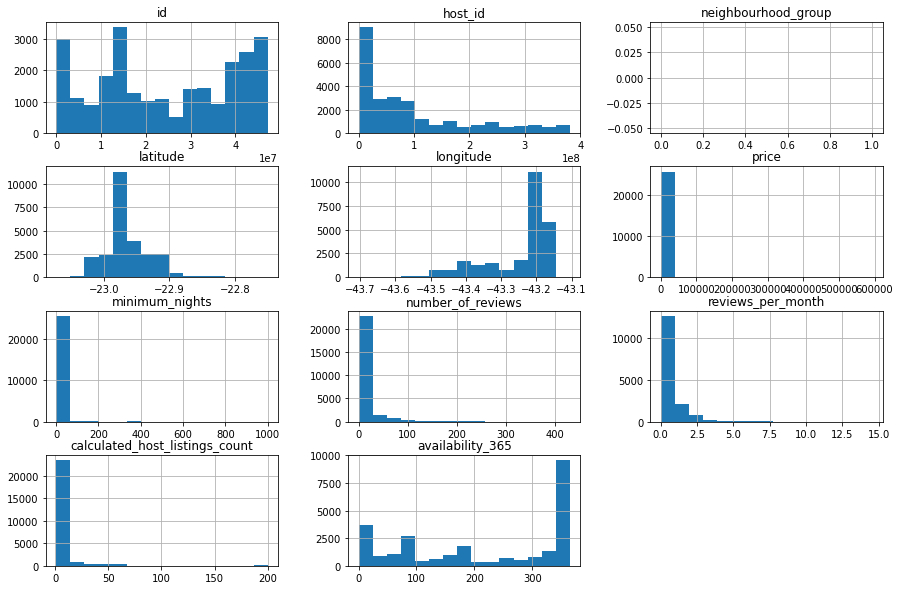

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### Verificando a existência de *outliers*

Outliers são dados que se diferenciam drasticamente de todos os outros (i.e., são 'pontos fora da curva') e que podem, portanto, enviesar negativamente o resultado de uma análise. 

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe, por exemplo, as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25784.000000,25784.000000,25784.000000,15852.000000,25784.000000,25784.000000
mean,879.820664,4.767491,11.960479,0.590130,6.582532,215.296114
std,5179.764367,19.042074,29.371931,0.819468,19.995586,140.893876
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,0.000000,0.100000,1.000000,83.000000
50%,380.000000,2.000000,1.000000,0.240000,1.000000,247.000000
75%,776.000000,4.000000,9.000000,0.780000,3.000000,359.000000
max,593266.000000,1000.000000,431.000000,14.550000,200.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 776, porém seu valor máximo é 593266.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano e 75% das ocupações exigem menos de 4 dias para locação.

#### Boxplot para o número mínimo de noites

Observamos que 199 entradas (aproximadamente 0,8%) para a variável `minimum nights` estavam acima de 30 dias. Quando observamos o boxplot para a variável `price`, no entanto, vemos que quase 10% das entradas (2.455) apresentavam valores acima de R$1.500. Para uma melhor representação destas variáveis, limparemos essas entradas excedentes em seguida. 


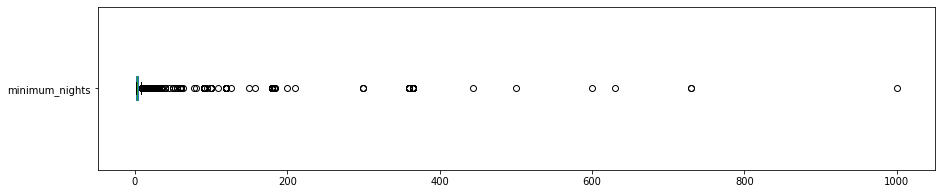

minimum_nights: valores acima de 30:
199 entradas
0.7718%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para preço

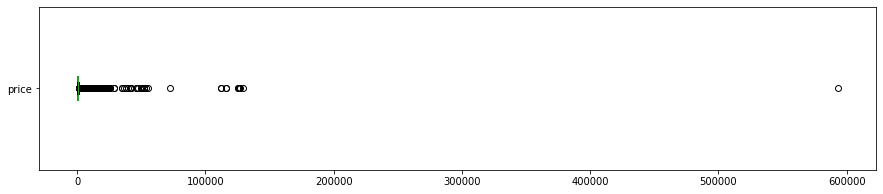


price: valores acima de 1500
2455 entradas
9.5214%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

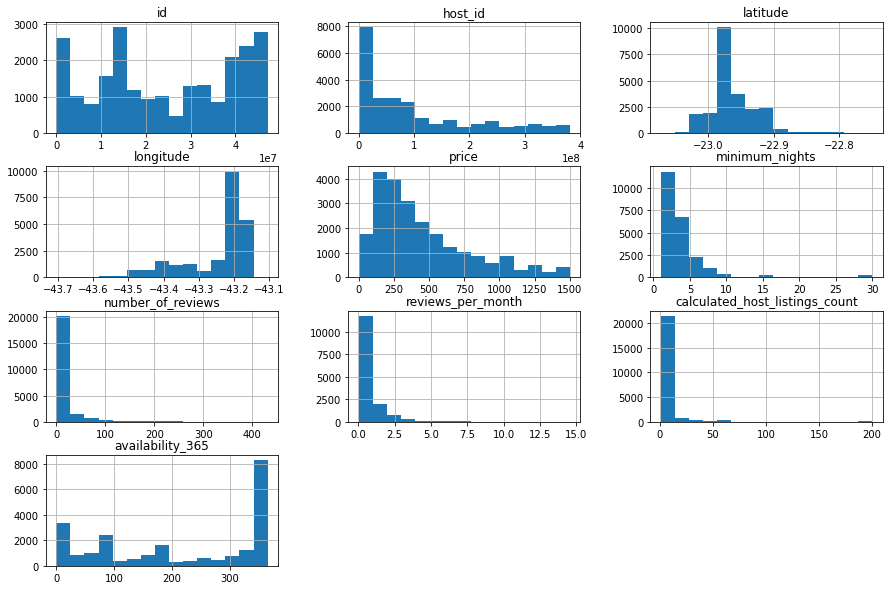

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### Correlação entre as variáveis

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

Abaixo, podemos notar que as variáveis `number of reviews` e `reviews per month` possuem uma alta correlação positiva. No entanto, essa observação não nos é útil, uma vez que sabemos que um maior número de *reviews* implica necessariamente em um maior número de *reviews* por mês.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.093798,-0.079755,-0.075201,0.171244,0.049127
minimum_nights,0.093798,1.000000,-0.069582,-0.102222,-0.029608,-0.002706
number_of_reviews,-0.079755,-0.069582,1.000000,0.644582,-0.034952,-0.076313
reviews_per_month,-0.075201,-0.102222,0.644582,1.000000,0.003108,-0.154244
calculated_host_listings_count,0.171244,-0.029608,-0.034952,0.003108,1.000000,0.008742
availability_365,0.049127,-0.002706,-0.076313,-0.154244,0.008742,1.000000


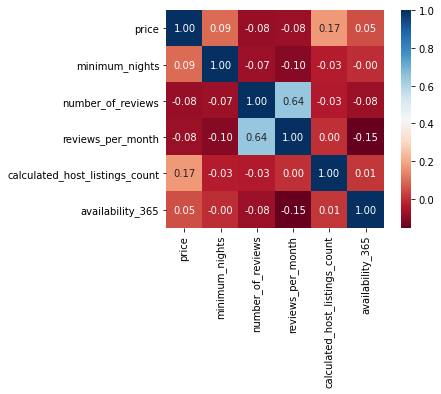

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Qual o tipo de imóvel mais alugado no Airbnb?

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, o aluguel de apenas um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`. 

Observa-se que a grande maioria (quase 70%) das acomodações ofertadas estão entre casas inteiras e apartamentos. Nota-se, ainda, que quartos em hotéis representam apenas 0,04% do total de acomodações, o que aponta para o maior enfoque C2C (*Consumer to Consumer*) proposto pela plataforma.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16201
Private room        6268
Shared room          579
Hotel room           105
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.699737
Private room       0.270721
Shared room        0.025008
Hotel room         0.004535
Name: room_type, dtype: float64

### Qual a localidade mais cara do Rio de Janeiro?

Uma maneira de se verificar uma variável em função da outra é usando o `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço médio de locação. Vemos, no caso abaixo, que o maior preço médio em Vista Alegre se trata de um resultado distorcido pela falta de representatividade da amostra (apenas uma acomodação ao preço de R$1.262).


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vista Alegre    1262.000000
Grumari         1003.000000
Cavalcanti       925.000000
Anchieta         800.000000
Vaz Lobo         797.000000
Cacuia           795.000000
Osvaldo Cruz     780.000000
Leblon           650.875000
Ipanema          599.598925
Lagoa            593.735577
Name: price, dtype: float64

In [ ]:
# ver quantidade de imóveis no bairro Vista Alegre
print(df_clean[df_clean.neighbourhood == "Vista Alegre"].shape)

# ver as 3 entradas do bairro Vista Alegre
df_clean[df_clean.neighbourhood == "Vista Alegre"]

(1, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7923,13654995,Cozy colonial style room,79273288,Sérgio,Vista Alegre,-22.8286,-43.31916,Private room,1262,1,1,2016-08-05,0.02,1,365


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível também plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`. O mapa abaixo nos mostra onde estão concentrados os locais disponíveis para locação e seus respectivos preços (representados pelas diferentes cores).

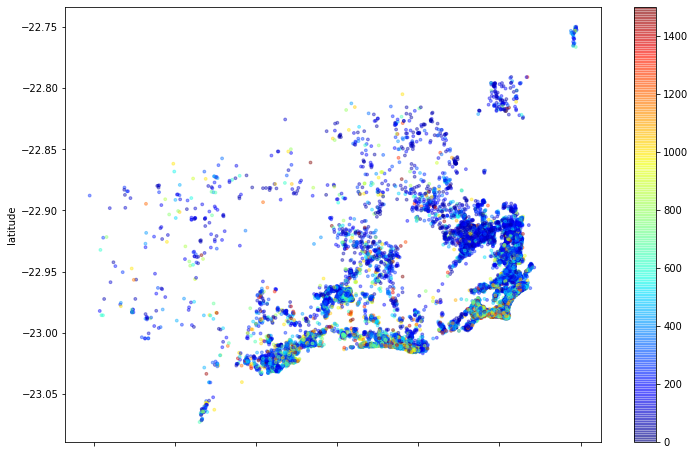

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Neste breve artigo, me propus a uma análise superficial na base de dados do Airbnb empregando alguns dos principais instrumentos envolvendo a análise exploratória dos dados. Percebemos, dentre outras coisas, a existência de outliers em algumas das variáveis, o que torna indispensável um prévio tratamento dos dados antes de qualquer análise envolvendo este *dataset*.

Também foi possível notar que em algumas localidades existem poucos imóveis disponíveis. Isso, por sua vez, poderia distorcer as informações estatísticas de alguns atributos e, assim como a presença de *outliers*, comprometer nossa análise.

Por fim, é importante lembrarmos que o *dataset* utilizado para esta análise é uma versão resumida, ideal apenas para uma abordagem inicial. Como já citado anteriormente, para análises mais aprofundadas ou uma análise exploratória mais completa, é recomendável que se faça uso do conjunto de dados completos, igualmente disponível no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).